In [1]:
import os
import pandas as pd
import numpy as np

# Data read & Preprocessing

In [8]:
os.chdir('../Data/')
TrainFileNames = ['EpilepsyDimension1_TRAIN.arff', 'EpilepsyDimension2_TRAIN.arff', 'EpilepsyDimension3_TRAIN.arff']
TestFileNames = ['EpilepsyDimension1_TEST.arff', 'EpilepsyDimension2_TEST.arff', 'EpilepsyDimension3_TEST.arff']

In [9]:
pd.read_csv(TrainFileNames[0], header=None,  skiprows=211).head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,0.35,0.40,0.44,0.47,0.48,0.47,0.44,0.42,0.43,0.37,...,0.51,0.50,0.55,0.54,0.58,0.61,0.62,0.65,0.69,EPILEPSY
1,-0.91,-0.92,-0.95,-0.95,-0.95,-0.94,-0.96,-0.96,-0.95,-0.95,...,-0.51,-0.56,-0.58,-0.61,-0.56,-0.56,-0.47,-0.45,-0.45,EPILEPSY
2,0.32,0.71,0.70,0.75,0.88,0.58,1.34,0.66,0.71,0.23,...,0.63,0.60,0.60,0.59,0.59,0.58,0.59,0.59,0.59,EPILEPSY
3,-0.68,-0.36,-0.13,-0.38,-0.49,-0.48,-0.27,-0.26,-0.48,-0.44,...,-0.51,-0.38,-0.26,-0.25,-0.32,-0.32,-0.40,-0.23,-0.25,EPILEPSY
4,0.34,0.53,0.58,0.61,0.64,0.63,0.44,0.58,0.61,0.60,...,0.72,0.69,0.66,0.58,0.51,0.49,0.40,0.26,0.12,EPILEPSY


In [10]:
pd.read_csv(TestFileNames[0], header=None,  skiprows=211).head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,0.60,0.60,0.60,0.61,0.59,0.59,0.59,0.60,0.60,0.60,...,-0.75,-0.70,-0.68,-0.69,-0.70,-0.70,-0.69,-0.70,-0.70,EPILEPSY
1,-0.35,-0.44,-0.86,-0.64,-0.45,-0.25,-0.08,-0.07,0.30,0.73,...,-0.08,-0.06,-0.01,-0.05,-0.03,-0.11,-0.18,-0.16,-0.14,EPILEPSY
2,-0.08,-0.01,-0.53,-0.49,0.04,-0.44,-0.42,-0.04,0.04,-0.43,...,0.41,0.38,0.35,0.32,0.34,0.36,0.34,0.32,0.32,EPILEPSY
3,-0.43,-0.44,-0.47,-0.49,-0.53,-0.53,-0.57,-0.56,-0.51,-0.48,...,-0.27,-0.34,-0.36,-0.44,-0.35,-0.36,-0.34,-0.31,-0.31,EPILEPSY
4,-0.30,-0.81,-0.55,-0.81,-0.13,-1.10,-0.59,-0.64,-0.25,-1.06,...,-0.28,-0.37,-0.51,-0.66,-0.78,-0.87,-0.87,-0.81,-0.80,EPILEPSY


Data
- Time span = 207
- Data Columns: 3
- Samples
    - Train: 137
    - Test: 138

In [11]:
TrainChannels, TestChannels = [], []
for channel in range(0, 3):
    TrainChannels.append(pd.read_csv(TrainFileNames[channel], header=None,  skiprows=211).transpose())
    TestChannels.append(pd.read_csv(TestFileNames[channel], header=None,  skiprows=211).transpose())

In [12]:
print([Channel.shape for Channel in TrainChannels])
print([Channel.shape for Channel in TestChannels ])

[(207, 137), (207, 137), (207, 137)]
[(207, 138), (207, 138), (207, 138)]


## Data Preprocessing
- concatenate three cnannels to matrix

In [13]:
np.column_stack([
    TrainChannels[0][0],
    TrainChannels[1][0],
    TrainChannels[2][0]
])

array([[0.35, 0.22, 0.55],
       [0.4, 0.01, 0.51],
       [0.44, -0.71, 0.52],
       [0.47, -0.33, 0.44],
       [0.48, -0.4, 0.45],
       [0.47, 0.19, 0.56],
       [0.44, 0.36, 0.71],
       [0.42, -0.58, 0.63],
       [0.43, -1.45, 0.7],
       [0.37, -0.87, 0.81],
       [0.28, 0.42, 0.86],
       [0.18, 0.71, 0.89],
       [0.18, -0.95, 0.93],
       [0.16, -2.46, 0.95],
       [0.17, -1.1, 0.95],
       [0.12, 0.58, 0.96],
       [0.12, 1.02, 0.98],
       [0.17, -0.47, 1.0],
       [0.2, -2.46, 0.98],
       [0.32, -0.91, 0.94],
       [0.42, 0.51, 0.93],
       [0.47, 0.91, 0.91],
       [0.56, -1.18, 0.88],
       [0.7, -2.18, 0.87],
       [0.79, -0.67, 0.87],
       [0.83, 0.13, 0.9],
       [0.88, 0.63, 0.9],
       [0.89, -1.17, 0.86],
       [0.89, -2.0, 0.82],
       [0.9, -0.6, 0.84],
       [0.89, 0.04, 0.77],
       [0.85, 0.64, 0.79],
       [0.8, -1.27, 0.82],
       [0.7, -1.08, 0.69],
       [0.59, -0.74, 0.63],
       [0.49, 0.18, 0.66],
       [0.47, 0.48, 0

In [14]:
Train_x = []
Train_y = TrainChannels[0].loc[206]
for i in range(137):
    Train_x.append(
        np.column_stack([
            TrainChannels[0][i][:206],
            TrainChannels[1][i][:206],
            TrainChannels[2][i][:206]
        ])
    )
Train_x = np.stack(Train_x)

In [15]:
Test_x = []
Test_y = TestChannels[0].loc[206]
for i in range(138):
    Test_x.append(
        np.column_stack([
            TestChannels[0][i][:206],
            TestChannels[1][i][:206],
            TestChannels[2][i][:206]
        ])
    )
Test_x = np.stack(Test_x)

## Simple Visualization

In [16]:
tmpPatient = pd.DataFrame(Train_x[0])
print(Train_y[0])

EPILEPSY


<AxesSubplot:>

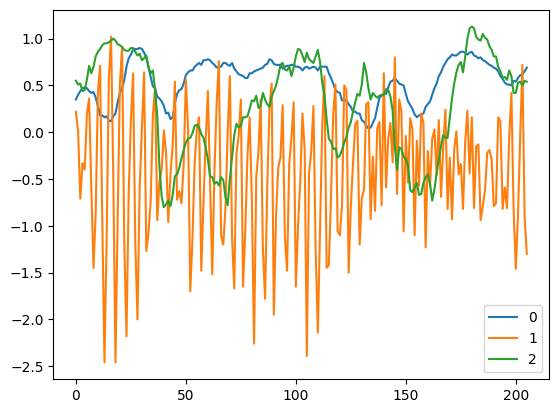

In [17]:
tmpPatient.plot()

<AxesSubplot:>

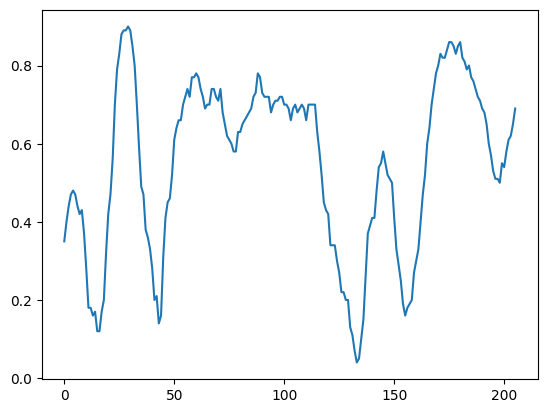

In [18]:
tmpPatient[0].plot()

<AxesSubplot:>

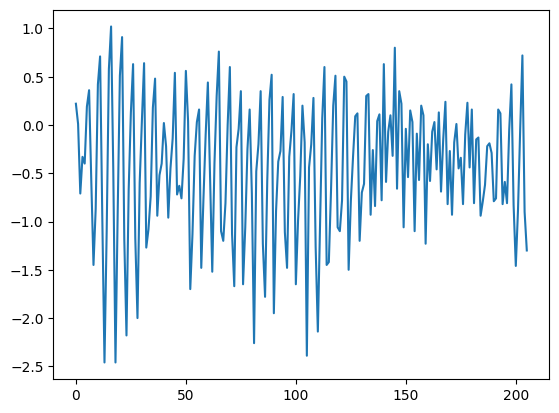

In [19]:
tmpPatient[1].plot()

<AxesSubplot:>

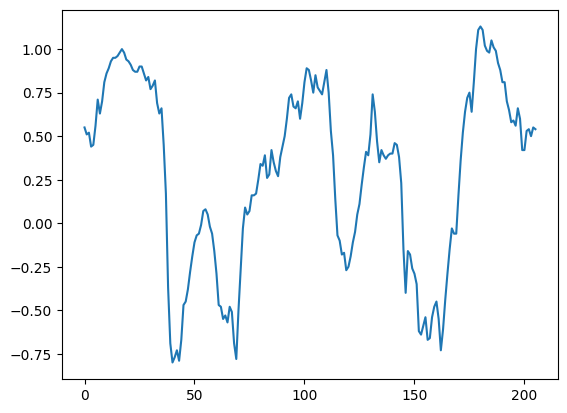

In [20]:
tmpPatient[2].plot()

### Data preprocessing

#### Check data type of Features

In [21]:
Train_x.dtype

dtype('O')

In [22]:
Train_x = Train_x.astype('float')
Test_x = Test_x.astype('float')

In [23]:
Train_x.dtype

dtype('float64')

#### Check label data type and encode to one-hot

In [24]:
Train_y.head()

0    EPILEPSY
1    EPILEPSY
2    EPILEPSY
3    EPILEPSY
4    EPILEPSY
Name: 206, dtype: object

In [25]:
Train_y = pd.get_dummies(Train_y)
Test_y = pd.get_dummies(Test_y)

In [26]:
Train_y

,EPILEPSY,RUNNING,SAWING,WALKING
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
132,0,0,1,0
133,0,0,1,0
134,0,0,1,0
135,0,0,1,0


### Save data to npz file

In [27]:
np.savez('EpilepsyData.npz', Train_x=Train_x, Train_y=Train_y, Test_x=Test_x, Test_y=Test_y)